# Peer-graded Assignment: "On-time" Loan Status versus "Risky" Loan Status

**==========================================================================================================**

## Project Description

Having investigated how characteristics of the applicant and loan application vary for both loans with “On Time” status and loans with “Risky” status, which of these factors appear to be more strongly associated with Risky loans compared to On Time loans? In your discussion, be sure to provide evidence of how you arrived at your conclusions. This may include tables of summary statistics (such as the mean and standard deviation) or visual comparisons between On Time and Risky loans. 

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|annual_inc |The self-reported annual income provided by the borrower during registration, in $1000s	|
|application_type |Indicates whether the loan is an individual application or a joint application with two co-borrowers	|
|collections_12_mths_ex_med |Number of collections in 12 months excluding medical collections	|
|delinq_2yrs |The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years	|
|dti |A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.	|
|home_ownership |The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.	|
|inq_last_6mths |The number of inquiries in past 6 months (excluding auto and mortgage inquiries)	|
|loan_status |Current status of the loan	|
|open_acc |The number of open credit lines in the borrower's credit file.	|
|pub_rec |Number of derogatory public records	|
|term |	The number of payments on the loan. Values are in months and can be either 36 or 60. |
|verification_status |Indicates if income was verified by LC, not verified, or if the income source was verified	|

**==========================================================================================================**

## Discussion from analysis

- Risky Group has annual lower income, higher delinquency and more inquires made
- Majority borrowers are indivduals to service their home mortgages, 36 months is preferred
- There is a slightly higher non-verified income applicants which may pose a loan risk

**==========================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random


import datetime
from datetime import datetime, timedelta, date


#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)
#sns.set(rc={'figure.figsize':(14,10)})

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**==========================================================================================================**

## Import Data

In [2]:
df = pd.read_csv("calibdata.csv", low_memory=False)

**==========================================================================================================**

## Data Quick Glance

In [3]:
df.head()

,annualinc,applytype,collections,delinq,inq,openacc,dti,pubrec,homeowner,term,vstatus,lstatus
0,205.00,INDIVIDUAL,0,0,2,28,23.72,0,MORTGAGE,60 months,Source Verified,On Time
1,36.00,INDIVIDUAL,0,0,0,8,22.77,0,RENT,36 months,Not Verified,On Time
2,48.00,INDIVIDUAL,0,0,1,10,13.68,0,RENT,36 months,Source Verified,On Time
3,40.00,INDIVIDUAL,0,0,0,11,8.37,0,MORTGAGE,36 months,Not Verified,On Time
4,83.00,INDIVIDUAL,0,0,0,18,23.50,0,RENT,36 months,Source Verified,On Time


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49986 entries, 0 to 49985
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   annualinc    49986 non-null  float64
 1   applytype    49986 non-null  object 
 2   collections  49986 non-null  int64  
 3   delinq       49986 non-null  int64  
 4   inq          49986 non-null  int64  
 5   openacc      49986 non-null  int64  
 6   dti          49986 non-null  float64
 7   pubrec       49986 non-null  int64  
 8   homeowner    49986 non-null  object 
 9   term         49986 non-null  object 
 10  vstatus      49986 non-null  object 
 11  lstatus      49986 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 4.6+ MB


In [5]:
df.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,annualinc,applytype,collections,delinq,inq,openacc,dti,pubrec,homeowner,term,vstatus,lstatus
count,49986.00,49986,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986,49986,49986,49986
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,5,2,3,2
top,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,MORTGAGE,36 months,Source Verified,On Time
freq,NaN,49958,NaN,NaN,NaN,NaN,NaN,NaN,24993,34857,18876,46551
mean,76.31,NaN,0.01,0.32,0.70,11.59,17.99,0.19,NaN,NaN,NaN,NaN
std,62.81,NaN,0.13,0.87,1.01,5.29,8.22,0.67,NaN,NaN,NaN,NaN
min,6.00,NaN,0.00,0.00,0.00,1.00,0.00,0.00,NaN,NaN,NaN,NaN
25%,47.00,NaN,0.00,0.00,0.00,8.00,11.83,0.00,NaN,NaN,NaN,NaN
50%,65.00,NaN,0.00,0.00,0.00,11.00,17.53,0.00,NaN,NaN,NaN,NaN
75%,90.00,NaN,0.00,0.00,1.00,14.00,23.66,0.00,NaN,NaN,NaN,NaN


In [7]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,annualinc,collections,delinq,inq,openacc,dti,pubrec
count,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00,49986.00
mean,76.31,0.01,0.32,0.70,11.59,17.99,0.19
std,62.81,0.13,0.87,1.01,5.29,8.22,0.67
min,6.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,47.00,0.00,0.00,0.00,8.00,11.83,0.00
50%,65.00,0.00,0.00,0.00,11.00,17.53,0.00
75%,90.00,0.00,0.00,1.00,14.00,23.66,0.00
max,8253.00,5.00,27.00,33.00,58.00,39.99,63.00


In [8]:
# Descriptive Statistical Analysis
df.describe(include="object")

,applytype,homeowner,term,vstatus,lstatus
count,49986,49986,49986,49986,49986
unique,2,5,2,3,2
top,INDIVIDUAL,MORTGAGE,36 months,Source Verified,On Time
freq,49958,24993,34857,18876,46551


In [9]:
df.columns

Index(['annualinc', 'applytype', 'collections', 'delinq', 'inq', 'openacc', 'dti', 'pubrec', 'homeowner', 'term', 'vstatus', 'lstatus'], dtype='object')

In [10]:
df.shape

(49986, 12)

In [11]:
df.isnull().sum()

annualinc      0
applytype      0
collections    0
delinq         0
inq            0
openacc        0
dti            0
pubrec         0
homeowner      0
term           0
vstatus        0
lstatus        0
dtype: int64

In [12]:
df.duplicated().sum()

0

**==========================================================================================================**

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the crucial process of using summary statistics and graphical representations to perform preliminary investigations on data to uncover patterns, detect anomalies, test hypotheses, and verify assumptions.

## Sample a smaller dataset

In [13]:
df = df.sample(frac=0.2)

In [14]:
df

,annualinc,applytype,collections,delinq,inq,openacc,dti,pubrec,homeowner,term,vstatus,lstatus
23833,50.00,INDIVIDUAL,0,0,0,7,16.83,0,MORTGAGE,36 months,Verified,On Time
27452,68.00,INDIVIDUAL,0,0,1,12,16.01,0,RENT,36 months,Not Verified,On Time
10983,80.00,INDIVIDUAL,0,0,0,12,20.28,0,RENT,36 months,Not Verified,On Time
10021,62.00,INDIVIDUAL,0,0,0,8,17.50,0,MORTGAGE,36 months,Verified,On Time
24450,97.30,INDIVIDUAL,0,0,1,10,12.14,0,RENT,60 months,Source Verified,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...
47673,54.00,INDIVIDUAL,0,0,0,7,3.42,0,RENT,36 months,Not Verified,On Time
5524,73.00,INDIVIDUAL,0,0,1,17,24.53,0,RENT,36 months,Verified,On Time
19369,25.00,INDIVIDUAL,0,0,0,9,24.24,0,RENT,36 months,Source Verified,On Time
46979,65.00,INDIVIDUAL,0,0,0,6,15.19,0,RENT,36 months,Verified,On Time


In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df

,annualinc,applytype,collections,delinq,inq,openacc,dti,pubrec,homeowner,term,vstatus,lstatus
0,50.00,INDIVIDUAL,0,0,0,7,16.83,0,MORTGAGE,36 months,Verified,On Time
1,68.00,INDIVIDUAL,0,0,1,12,16.01,0,RENT,36 months,Not Verified,On Time
2,80.00,INDIVIDUAL,0,0,0,12,20.28,0,RENT,36 months,Not Verified,On Time
3,62.00,INDIVIDUAL,0,0,0,8,17.50,0,MORTGAGE,36 months,Verified,On Time
4,97.30,INDIVIDUAL,0,0,1,10,12.14,0,RENT,60 months,Source Verified,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...
9992,54.00,INDIVIDUAL,0,0,0,7,3.42,0,RENT,36 months,Not Verified,On Time
9993,73.00,INDIVIDUAL,0,0,1,17,24.53,0,RENT,36 months,Verified,On Time
9994,25.00,INDIVIDUAL,0,0,0,9,24.24,0,RENT,36 months,Source Verified,On Time
9995,65.00,INDIVIDUAL,0,0,0,6,15.19,0,RENT,36 months,Verified,On Time


In [17]:
df.shape

(9997, 12)

In [18]:
df.sort_values(by = "lstatus", ascending=True).head()

,annualinc,applytype,collections,delinq,inq,openacc,dti,pubrec,homeowner,term,vstatus,lstatus
0,50.00,INDIVIDUAL,0,0,0,7,16.83,0,MORTGAGE,36 months,Verified,On Time
6519,42.00,INDIVIDUAL,0,4,0,5,7.74,0,MORTGAGE,36 months,Source Verified,On Time
6520,45.00,INDIVIDUAL,0,0,1,7,8.93,0,OWN,36 months,Not Verified,On Time
6521,160.00,INDIVIDUAL,0,0,3,8,12.54,0,MORTGAGE,60 months,Verified,On Time
6522,40.00,INDIVIDUAL,0,0,1,13,39.23,0,RENT,36 months,Verified,On Time


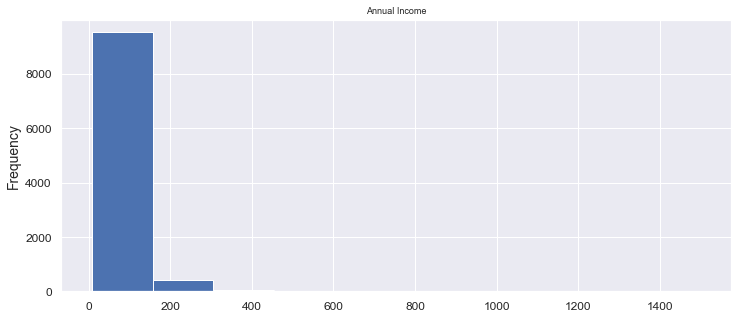

In [19]:
df.annualinc.plot(kind = "hist", figsize = (12,5), fontsize = 12, title="Annual Income")
plt.show()

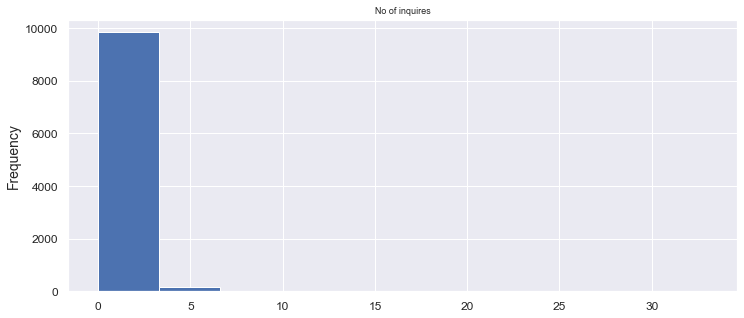

In [20]:
df.inq.plot(kind = "hist", figsize = (12,5), fontsize = 12, title="No of inquires")
plt.show()

In [21]:
df.lstatus.value_counts().sort_values(ascending=False)

On Time    9304
Risky       693
Name: lstatus, dtype: int64

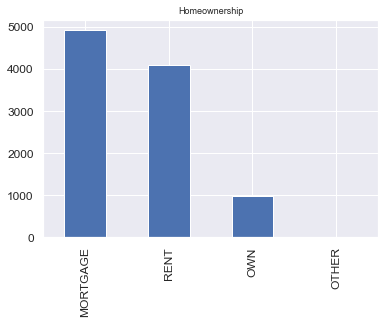

In [22]:
df.homeowner.value_counts().nlargest(10).plot(kind="bar")
plt.title("Homeownership")
plt.show()

**==========================================================================================================**

## Groupby

Most commonly, we use `groupby()` to split the data into groups,this will apply some function to each of the groups (e.g. mean, median, min, max, count), then combine the results into a data structure. For example, let's select the 'VALUE' column and calculate the mean of the gasoline prices per year. First, we specify the 'Year" column, following by the 'VALUE' column, and the `mean()` function.

In [23]:
df.columns

Index(['annualinc', 'applytype', 'collections', 'delinq', 'inq', 'openacc', 'dti', 'pubrec', 'homeowner', 'term', 'vstatus', 'lstatus'], dtype='object')

In [24]:
df.groupby(["lstatus"], as_index=True).mean()

,annualinc,collections,delinq,inq,openacc,dti,pubrec
lstatus,,,,,,,
On Time,76.68,0.01,0.30,0.67,11.64,18.06,0.18
Risky,66.73,0.01,0.36,1.03,11.31,18.44,0.15


In [25]:
df.groupby(["lstatus"], as_index=True).median()

,annualinc,collections,delinq,inq,openacc,dti,pubrec
lstatus,,,,,,,
On Time,65.00,0.00,0.00,0.00,11.00,17.59,0.00
Risky,55.62,0.00,0.00,1.00,11.00,18.00,0.00


### Different Aggregates for Different Columns

In [26]:
df.groupby(["lstatus"], as_index=False).agg(
    {"annualinc": [np.min,np.median,np.max], "delinq": [np.min,np.median,np.max]})

lstatus annualinc                delinq            
                amin median    amax   amin median amax
0  On Time      7.00  65.00 1500.00      0   0.00   12
1    Risky     13.20  55.62  275.00      0   0.00    6

**==========================================================================================================**

# Data Visualization

In [27]:
df.columns

Index(['annualinc', 'applytype', 'collections', 'delinq', 'inq', 'openacc', 'dti', 'pubrec', 'homeowner', 'term', 'vstatus', 'lstatus'], dtype='object')

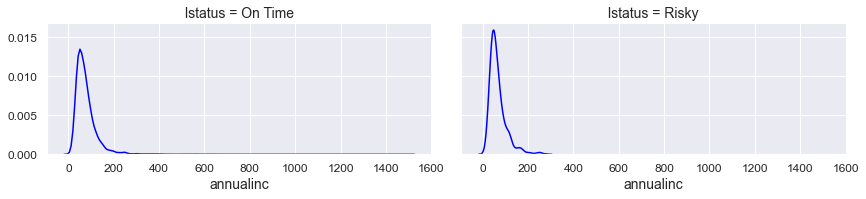

In [28]:
g = sns.FacetGrid(data=df, col="lstatus", hue=None, col_wrap=2, height=3, aspect=2, margin_titles=True)
g.map(sns.kdeplot, "annualinc", color="blue")
g.add_legend()
plt.show()

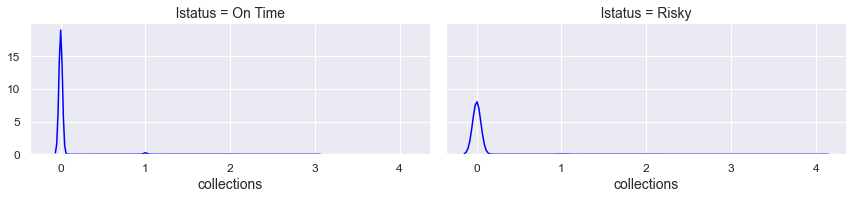

In [29]:
g = sns.FacetGrid(data=df, col="lstatus", hue=None, col_wrap=2, height=3, aspect=2, margin_titles=True)
g.map(sns.kdeplot, "collections", color="blue")
g.add_legend()
plt.show()

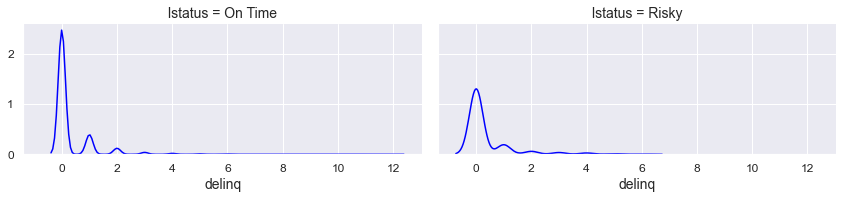

In [30]:
g = sns.FacetGrid(data=df, col="lstatus", hue=None, col_wrap=2, height=3, aspect=2, margin_titles=True)
g.map(sns.kdeplot, "delinq", color="blue")
g.add_legend()
plt.show()

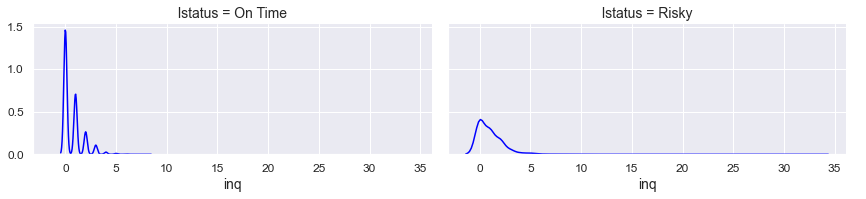

In [31]:
g = sns.FacetGrid(data=df, col="lstatus", hue=None, col_wrap=2, height=3, aspect=2, margin_titles=True)
g.map(sns.kdeplot, "inq", color="blue")
g.add_legend()
plt.show()

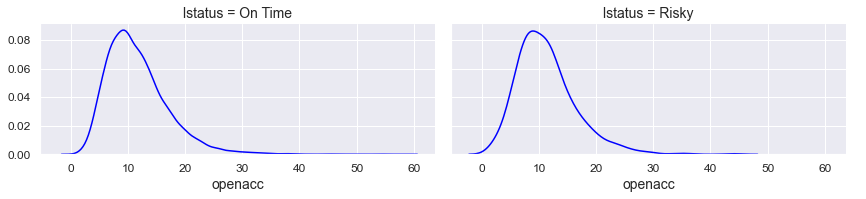

In [32]:
g = sns.FacetGrid(data=df, col="lstatus", hue=None, col_wrap=2, height=3, aspect=2, margin_titles=True)
g.map(sns.kdeplot, "openacc", color="blue")
g.add_legend()
plt.show()

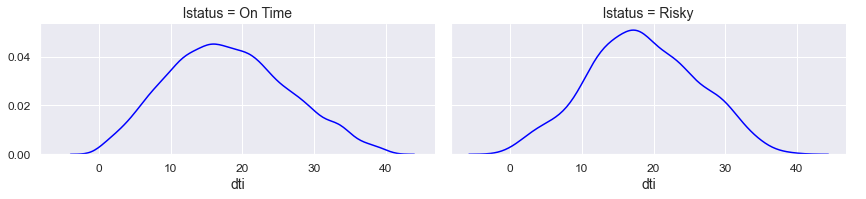

In [33]:
g = sns.FacetGrid(data=df, col="lstatus", hue=None, col_wrap=2, height=3, aspect=2, margin_titles=True)
g.map(sns.kdeplot, "dti", color="blue")
g.add_legend()
plt.show()

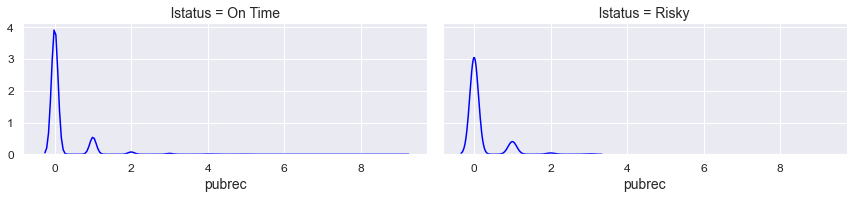

In [34]:
g = sns.FacetGrid(data=df, col="lstatus", hue=None, col_wrap=2, height=3, aspect=2, margin_titles=True)
g.map(sns.kdeplot, "pubrec", color="blue")
g.add_legend()
plt.show()

**==========================================================================================================**

## Bar Plots

In [35]:
df.head(1)

,annualinc,applytype,collections,delinq,inq,openacc,dti,pubrec,homeowner,term,vstatus,lstatus
0,50.00,INDIVIDUAL,0,0,0,7,16.83,0,MORTGAGE,36 months,Verified,On Time


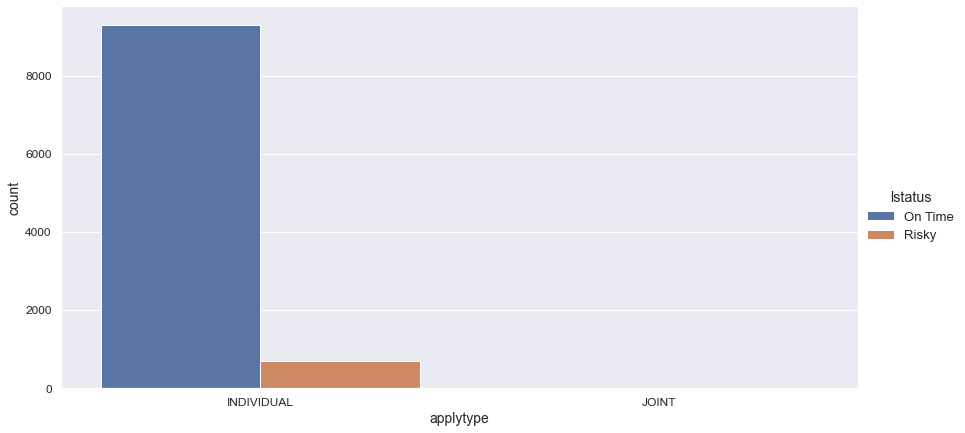

In [36]:
sns.catplot(x="applytype",  kind='count', data=df, hue ='lstatus', aspect=2, height=6)
plt.show()

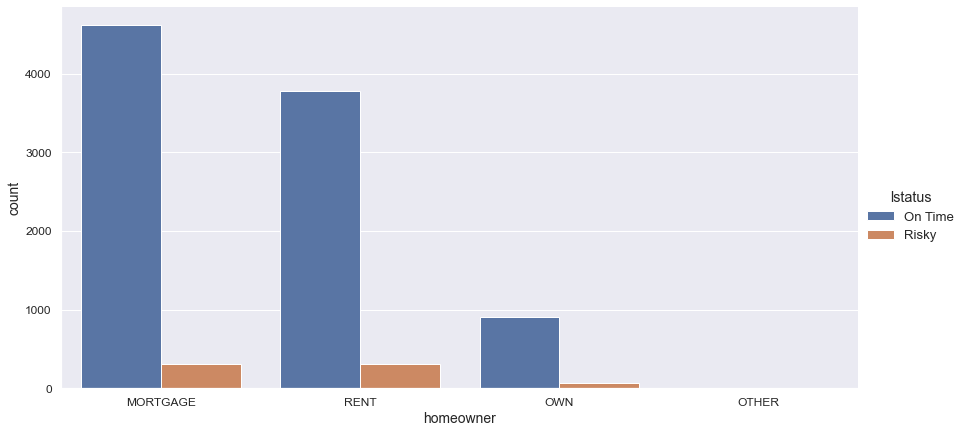

In [37]:
sns.catplot(x="homeowner",  kind='count', data=df, hue ='lstatus', aspect=2, height=6)
plt.show()

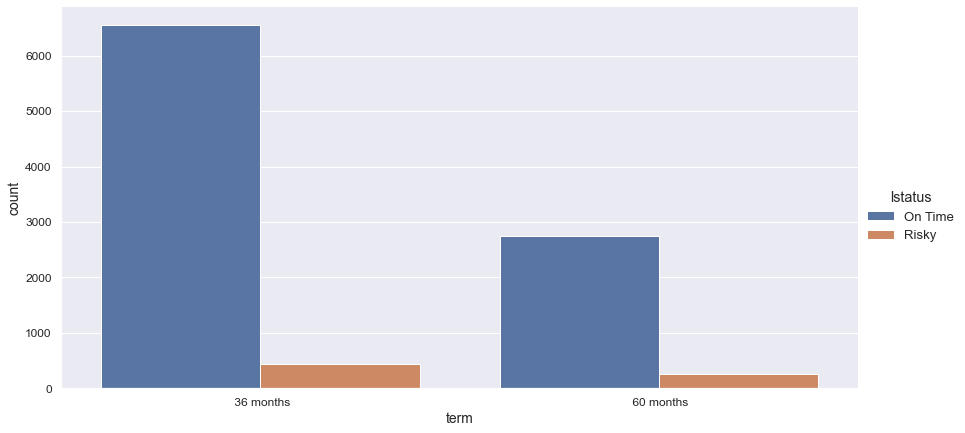

In [38]:
sns.catplot(x="term",  kind='count', data=df, hue ='lstatus', aspect=2, height=6)
plt.show()

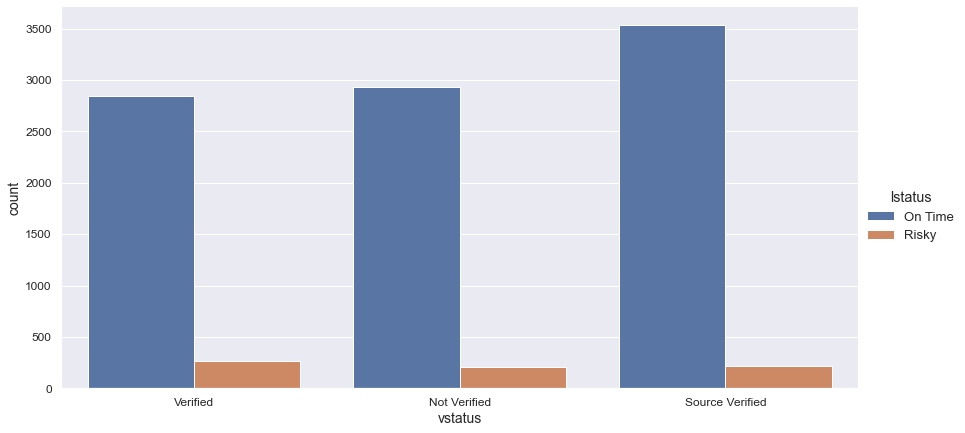

In [39]:
sns.catplot(x="vstatus",  kind='count', data=df, hue ='lstatus', aspect=2, height=6)
plt.show()

**==========================================================================================================**

**==========================================================================================================**

## Heatmap

### Seaborn Version

In [40]:
df.head()

,annualinc,applytype,collections,delinq,inq,openacc,dti,pubrec,homeowner,term,vstatus,lstatus
0,50.00,INDIVIDUAL,0,0,0,7,16.83,0,MORTGAGE,36 months,Verified,On Time
1,68.00,INDIVIDUAL,0,0,1,12,16.01,0,RENT,36 months,Not Verified,On Time
2,80.00,INDIVIDUAL,0,0,0,12,20.28,0,RENT,36 months,Not Verified,On Time
3,62.00,INDIVIDUAL,0,0,0,8,17.50,0,MORTGAGE,36 months,Verified,On Time
4,97.30,INDIVIDUAL,0,0,1,10,12.14,0,RENT,60 months,Source Verified,On Time


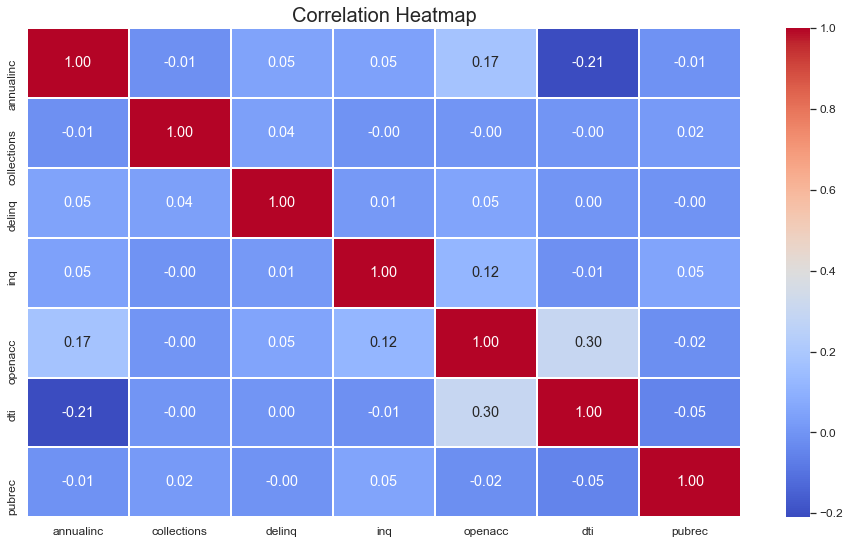

In [41]:
plt.figure(figsize=(16,9))
sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True, fmt='.2f', linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

**==========================================================================================================**

## Pairplot

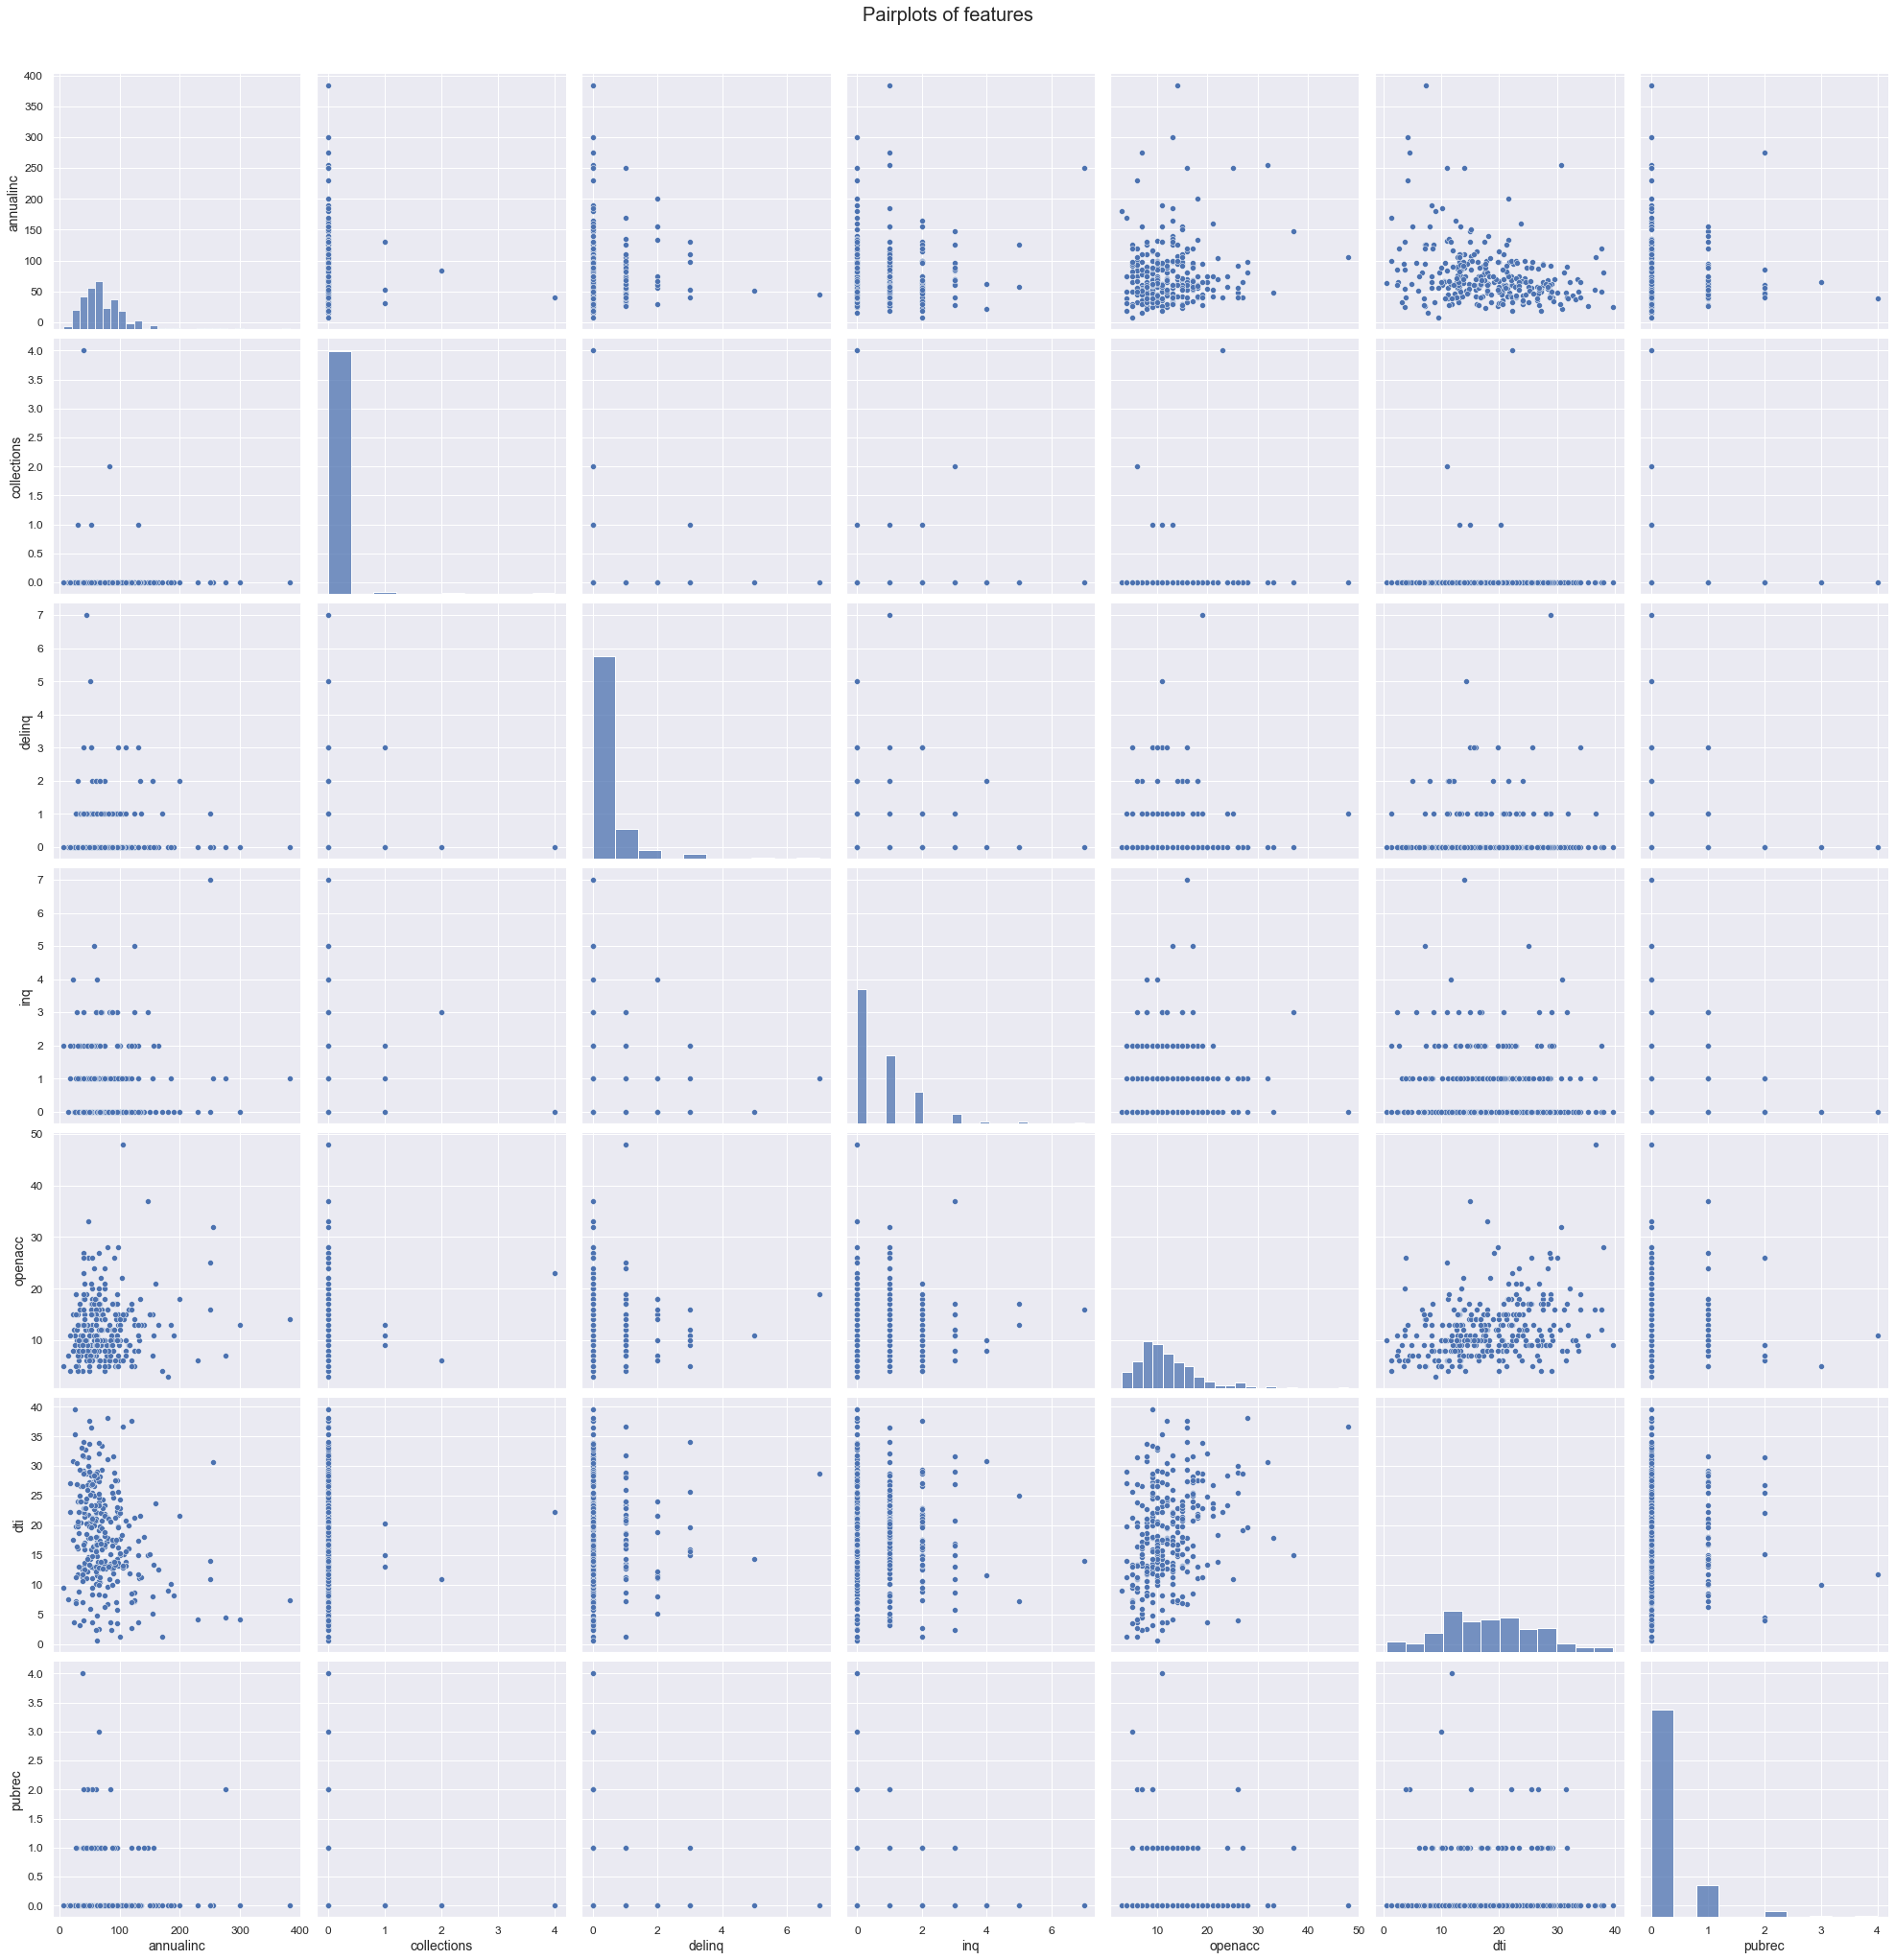

In [42]:
sns.pairplot(df.sample(300), height=4, aspect=1)
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)

plt.show()

**==========================================================================================================**

**==========================================================================================================**